In [1]:
import bagpipes as pipes
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy
from astropy.io import fits
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from astropy.io import fits

def load_photometry(ID):
    """Load the flux data from HST/Spitzer"""

    # load up the relevant columns from the catalogue.
    cat = np.loadtxt("/Users/pattybolan/Documents/CIII/catalogs/misc/photometry_fullsamp.cat",
                    usecols=(69, 71, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99,
                             70, 72, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100))
                            #435, 475, 555, 606, 625, 775, 814, 850lp, 105, 110, 125, 140, 160, ks, ch1, ch2
    
    
    # Find the correct row for the object we want.
    row = int(ID)

    # Extract the object we want from the catalogue.
    fluxes = cat[row, :15]
    fluxerrs = cat[row, 15:]

    # Turn these into a 2D array.
    photometry = np.c_[fluxes, fluxerrs]

    # blow up the errors associated with any missing fluxes.
    for i in range(len(photometry)):
        if (photometry[i, 0] == 0.) or (photometry[i, 1] <= 0) or (photometry[i, 0] == 99.) or (photometry[i, 0] == np.inf) or (photometry[i, 1] == np.inf) or (photometry[i, 0] > 10e8):
            photometry[i,:] = [0., 9.9*10**99.]
            
    return photometry


exp = {}                                  # Tau-model star-formation history component
exp["age"] = (0.02, 5.)                   # Vary age between 20 Myr and 3 Gyr. In practice 
                                          # the code automatically limits this to the age of
                                          # the Universe at the observed redshift.

exp["tau"] = (0.3, 10.)                   # Vary tau between 300 Myr and 10 Gyr
exp["massformed"] = (1., 15.)             # vary log_10(M*/M_solar) between 1 and 15
exp["metallicity"] = (0., 2.5)            # vary Z between 0 and 2.5 Z_oldsolar

dust = {}                                 # Dust component
dust["type"] = "Calzetti"                 # Define the shape of the attenuation curve
dust["Av"] = (0., 2.)                     # Vary Av between 0 and 2 magnitudes

component = {}
component["parameter_prior"] = "log_10" 

delayed = {}
delayed['age'] = 0, 2         # Gyr: Time since star formation began
delayed['tau'] = -1, -.001     # Gyr: Timescale of change (negative rising; positive falling)
delayed['massformed'] = 5, 13
delayed['metallicity'] = 0,0.5

constant = {}
constant['age_min'] = 0  # doesn't stop
constant['age_max'] = 0, 2
constant['massformed'] = 1, 15
constant['metallicity'] = (0, 2) #0.05

nebular = {}                      # Nebular emission component
nebular["logU"] = -3            # log_10(ionization parameter)

fit_instructions = {}                     # The fit instructions dictionary
fit_instructions["redshift"] = (6.471)  # Vary observed redshift from 0 to 10
#fit_instructions["exponential"] = exp   
fit_instructions["dust"] = dust
fit_instructions["nebular"] = nebular
fit_instructions["component"] = component
#fit_instructions["t_bc"] = 0.01 
#fit_instructions["constant"] = constant
fit_instructions["delayed"] = delayed

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Starting dense_basis. please wait ~ a minute for the FSPS backend to initialize.


In [6]:
catalog = pd.read_csv("/Users/pattybolan/Documents/CIII/catalogs/misc/photometry_fullsamp.cat", sep='\s+')

catalog[catalog['cluster']=='a370']
catalog.iloc[95:96]

,#,index,id,id_short,cluster,Cluster_observe,RA,RA_observe,Dec,Dec_observe,z_phot_noprior,z_phot,z_phot_l68,z_phot_u68,z_phot_l95,z_phot_u95,z_phot_l99,z_phot_u99,id_zGLASS,ra_zGLASS,dec_zGLASS,rmatch_zGLASS,z_zGLASS,z_zGLASS_Q,id_KBS16,ra_KBS16,dec_KBS16,rmatch_KBS16,z_KBS16,id_KHH,ra_KHH,dec_KHH,rmatch_KHH,z_s_KHH,z_a_KHH,z_p_KHH,z_l68_KHH,z_u68_KHH,z_l95_KHH,z_u95_KHH,z_l99_KHH,z_u99_KHH,id_AD,ra_AD,dec_AD,rmatch_AD,zbest_AD,zebstQ_AD,mu_AD,zsflag_AD,zspecid_AD,id_con,ra_con,dec_con,rmatch_con,z_con,z_errl_con,z_erru_con,zml_con,zsp_con,zsp_err_con,zsp_ref_con,id_mol,ra_mol,dec_mol,rmatch_mol,zb_mol,zb_min95_mol,zb_max95_mol,flux_f435w,fluxerr_f435w,flux_f475w,fluxerr_f475w,flux_f555w,fluxerr_f555w,flux_f606w,fluxerr_f606w,flux_f625w,fluxerr_f625w,flux_f775w,fluxerr_f775w,flux_f814w,fluxerr_f814w,flux_f850lp,fluxerr_f850lp,flux_f105w,fluxerr_f105w,flux_f110w,fluxerr_f110w,flux_f125w,fluxerr_f125w,flux_f140w,fluxerr_f140w,flux_f160w,fluxerr_f160w,flux_ks,fluxerr_ks,flux_ch1,fluxerr_ch1,flux_ch2,fluxerr_ch2,flux_ch3,fluxerr_ch3,flux_ch4,fluxerr_ch4,mag_f435w,magerr_f435w,mag_f475w,magerr_f475w,mag_f555w,magerr_f555w,mag_f606w,magerr_f606w,mag_f625w,magerr_f625w,mag_f775w,magerr_f775w,mag_f814w,magerr_f814w,mag_f850lp,magerr_f850lp,mag_f105w,magerr_f105w,mag_f110w,magerr_f110w,mag_f125w,magerr_f125w,mag_f140w,magerr_f140w,mag_f160w,magerr_f160w,mag_ks,magerr_ks,mag_ch1,magerr_ch1,mag_ch2,magerr_ch2,mag_ch3,magerr_ch3,mag_ch4,magerr_ch4,inst,z_spec,distance
95,95,81,103700001324,1324,a370,A370,39.966285,39.966302,-1.587101,-1.587095,10.563,2.794,1.935,4.213,1.171,6.275,0.58,10.641,0,0.0,0.0,4.20367,0.0,0.0,0,0.0,0.0,166986.542189,0.0,1324,39.966285,-1.587101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,3.630781e+09,1.000153e+11,3.630781e+09,0.0,3.630781e+09,0.0,3.630781e+09,9.913914e+10,3.630781e+09,0.0,3.630781e+09,0.0,0.005515,0.002857,3.630781e+09,0.0,3.630781e+09,9.701413e+10,3.630781e+09,0.0,3.630781e+09,9.663304e+10,0.015393,0.008758,0.024901,0.007447,0.690009,0.026931,3.630781e+09,8.954912e+10,0.110494,0.055559,3.630781e+09,0.0,3.630781e+09,0.0,0.0,29.915488,0.0,0.0,0.0,0.0,0.0,29.653433,0.0,0.0,0.0,0.0,29.54606,0.562494,0.0,0.0,0.0,29.017821,0.0,0.0,0.0,28.903835,28.431669,0.617887,27.909471,0.324785,0.0,27.824351,0.0,26.784968,26.291654,0.546069,0.0,0.0,0.0,0.0,deimos,6.61,[1.81831156e-05] deg2


In [66]:
print(load_photometry("14"))

[[0.00000000e+00 9.90000000e+99]
 [0.00000000e+00 9.90000000e+99]
 [0.00000000e+00 9.90000000e+99]
 [1.80749668e-02 1.18656747e-02]
 [0.00000000e+00 9.90000000e+99]
 [0.00000000e+00 9.90000000e+99]
 [0.00000000e+00 9.90000000e+99]
 [2.99136104e-02 1.33913427e-02]
 [4.30674467e-02 6.81018808e-03]
 [3.95703409e-02 1.21257178e-02]
 [5.06332758e-02 1.10898021e-02]
 [5.06748662e-02 9.59867274e-03]
 [0.00000000e+00 9.90000000e+99]
 [4.17951880e-01 1.13039306e-01]
 [4.69116496e-01 1.02431717e-01]]


In [67]:
filt_list = ["filters/f435w",
             "filters/f475w",
             "filters/f606w",
             "filters/f625w",
             "filters/f775w",
             "filters/f814w",
             "filters/f850lp",
             "filters/f105w",
             "filters/f110w",
             "filters/f125w",
             "filters/f140w",
             "filters/f160w",
             "filters/HAWKI_K",
             "filters/IRAC1",
             "filters/IRAC2"]

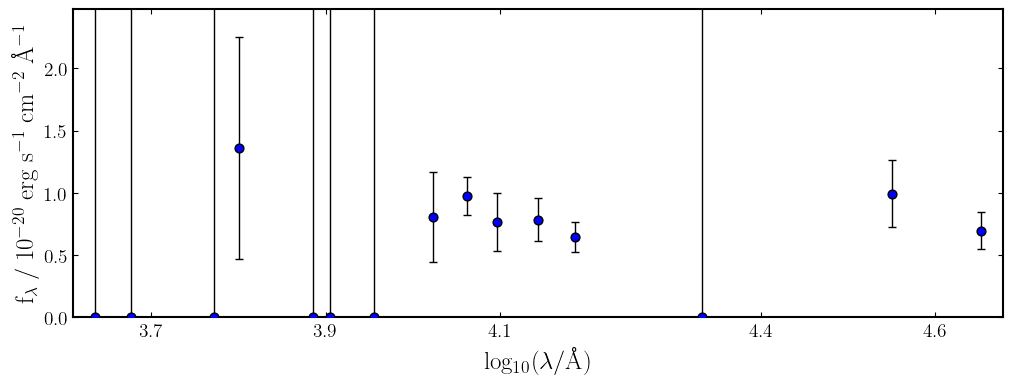

In [68]:
galaxy = pipes.galaxy("14", load_photometry, spectrum_exists=False, filt_list=filt_list)
fig = galaxy.plot()

In [69]:
rm pipes/posterior/./14.h5

In [70]:
fit = pipes.fit(galaxy, fit_instructions)

fit.fit(verbose=False)


Bagpipes: fitting object 14

 MultiNest Warning: no resume file found, starting from scratch
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    5
 *****************************************************

Completed in 31.8 seconds.
 ln(ev)=  -959.91945623564936      +/-  0.12066085593964584     
 Total Likelihood Evaluations:        11057
 Sampling finished. Exiting MultiNest

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
delayed:age                    0.174      0.466      0.708
delayed:massformed             9.783     10.081     10.259
delayed:metallicity            0.105      0.271      0.419
delayed:tau                   -0.868     -0.561     -0.219
dust:Av                        1.435      1.608      1.768




In [71]:
print(np.median(10**fit.posterior.samples["stellar_mass"])/4.1/(10**7))
print(np.median(fit.posterior.samples["sfr"])/4.1)
print(np.median(np.log10(fit.posterior.samples["sfr"]) - fit.posterior.samples["stellar_mass"]))
print(np.percentile(fit.posterior.samples["mass_weighted_age"], (16, 84)))

215.0027137122788
14.710098322966425
-8.158271726424148
[0.04693466 0.18210025]


In [72]:
list(fit.posterior.samples)

['delayed:age',
 'delayed:massformed',
 'delayed:metallicity',
 'delayed:tau',
 'dust:Av',
 'stellar_mass',
 'formed_mass',
 'sfr',
 'ssfr',
 'nsfr',
 'mass_weighted_age',
 'tform',
 'tquench',
 'mass_weighted_metallicity',
 'sfh']

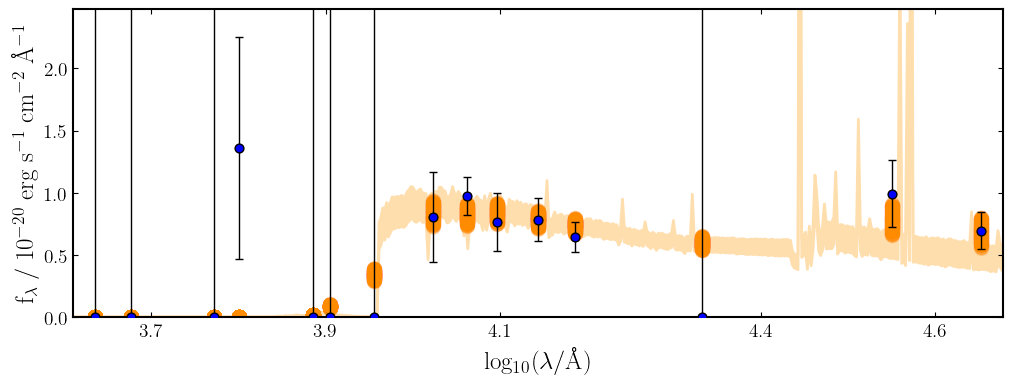

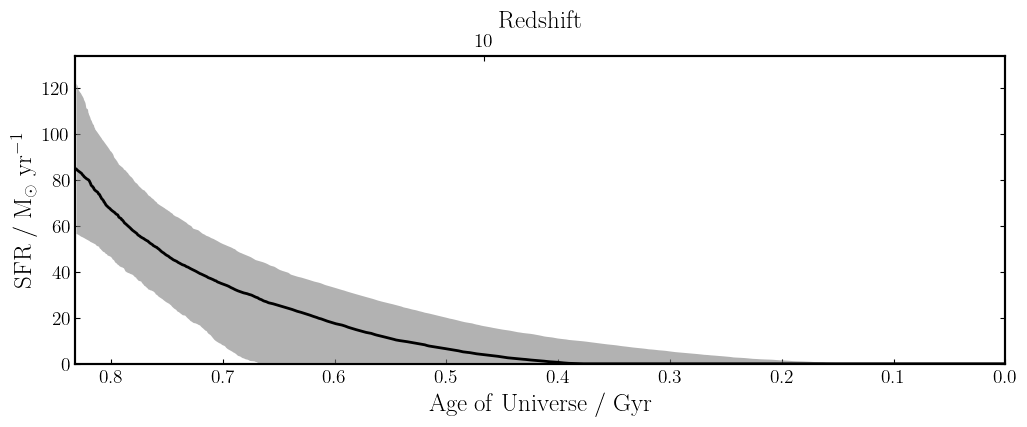

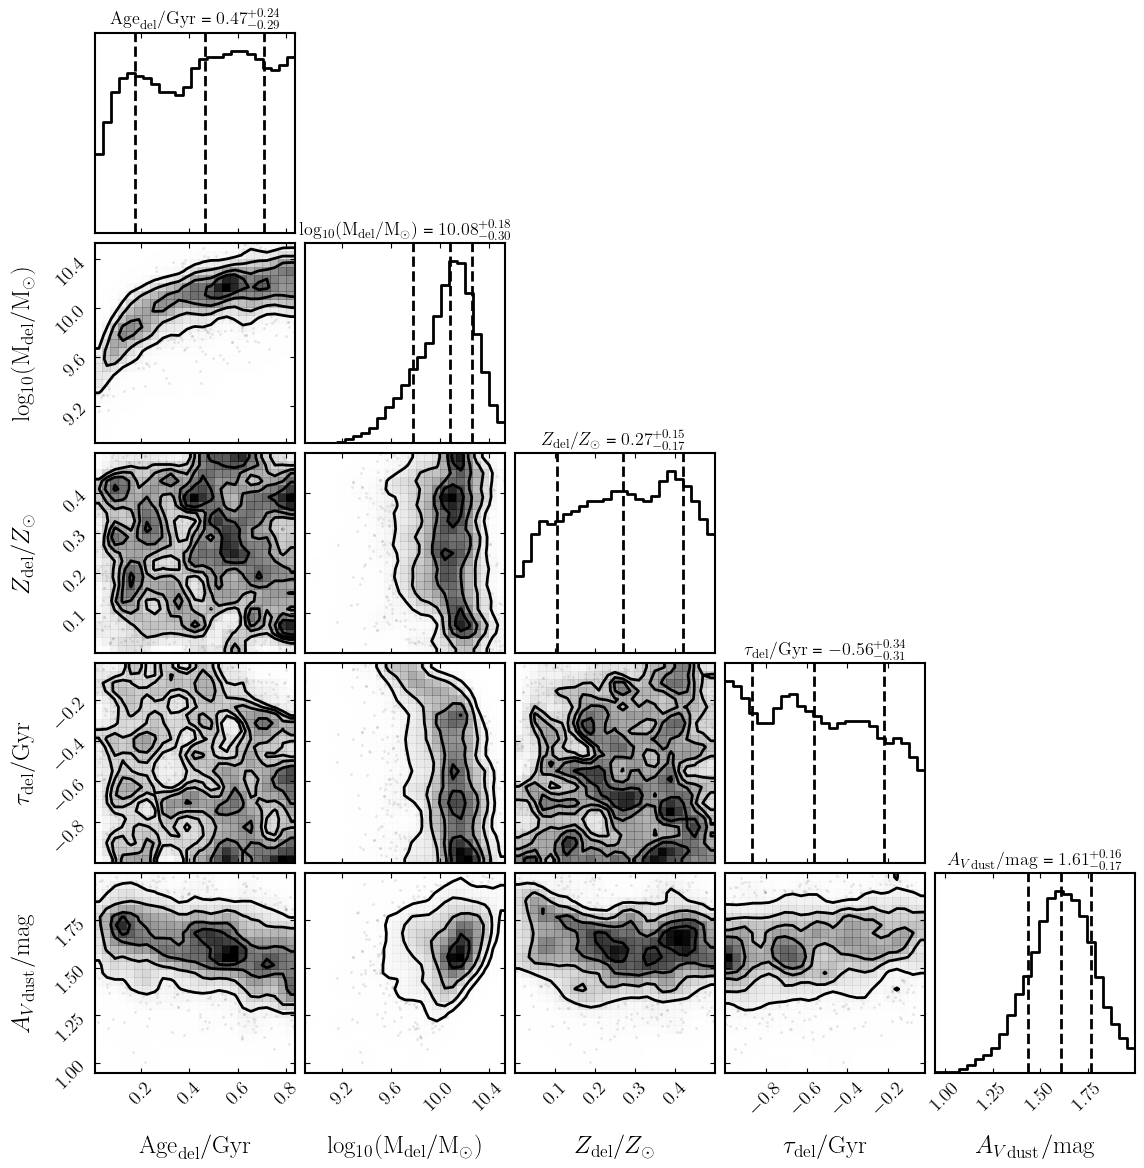

In [73]:
fig = fit.plot_spectrum_posterior(save=False, show=True)
fig = fit.plot_sfh_posterior(save=False, show=True)
fig = fit.plot_corner(save=False, show=True)

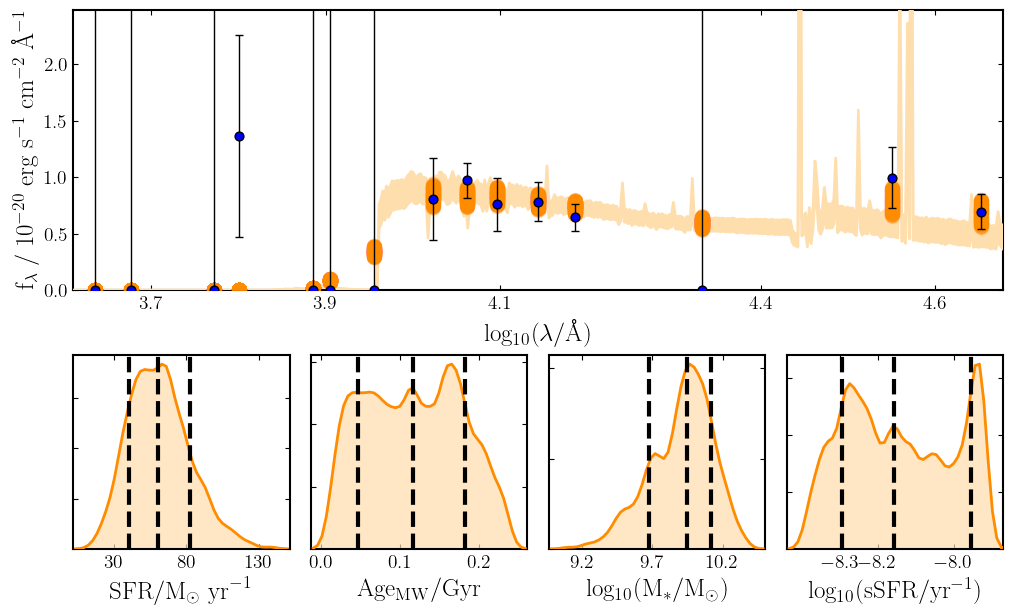

In [74]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.close()

fig = plt.figure(figsize=(12, 7))
gs = mpl.gridspec.GridSpec(7, 4, hspace=3., wspace=0.1)

ax1 = plt.subplot(gs[:4, :])

pipes.plotting.add_observed_photometry(fit.galaxy, ax1, zorder=10)
pipes.plotting.add_photometry_posterior(fit, ax1)

labels = ["sfr", "mass_weighted_age", "stellar_mass", "ssfr"]

post_quantities = dict(zip(labels, [fit.posterior.samples[l] for l in labels]))

axes = []
for i in range(4):
    axes.append(plt.subplot(gs[4:, i]))
    pipes.plotting.hist1d(post_quantities[labels[i]], axes[-1], smooth=True, label=labels[i])

plt.savefig('pipes/plots/rxj1347.36_posteriors_23feb_delayedsfh.pdf')
plt.show()